## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [2]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


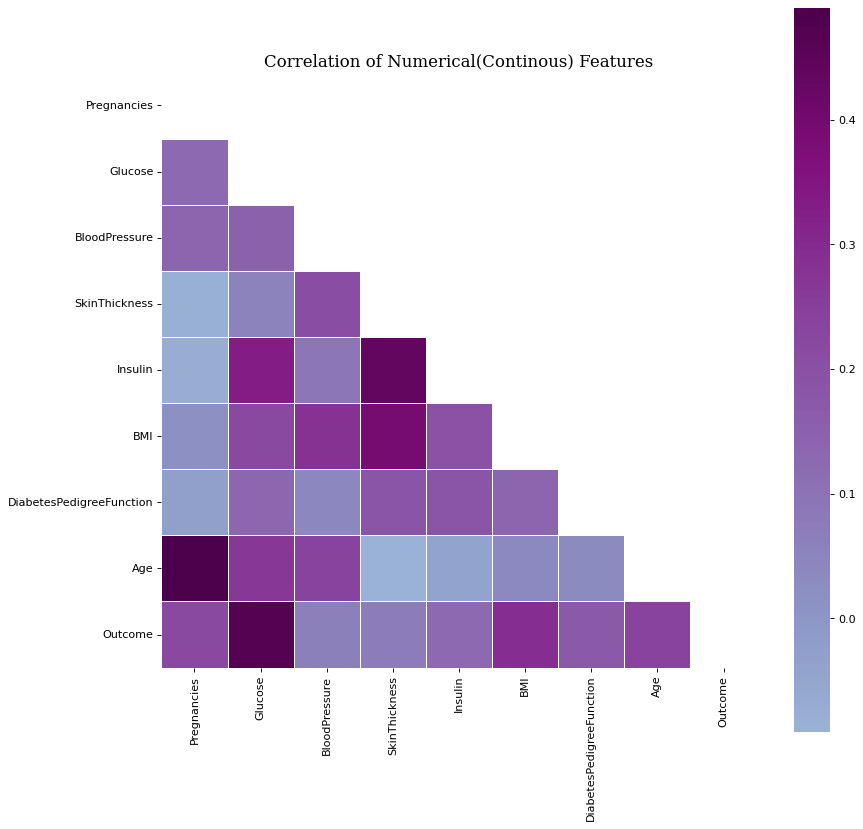

In [4]:
corr = df.corr()

fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical(Continous) Features', fontsize=15,font="Serif")
plt.show()

In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values.

Dropping the Outcome as it is the dependeent variable we need to predict.

In [32]:
#independent feature
X=df.drop('Outcome',axis=1).values
#dependent features
y=df['Outcome'].values

## Implementation

#### Splitting to Train and Test Data

Splitting data to train and test using train_test_split in scikit learn library

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Importing pytorch libraries

In [45]:
#libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
#activation functions


from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#### Converting to pytorch Tensors

In [46]:
#creating tensors

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)

X_train_tensor=torch.FloatTensor(X_train)
X_test_tensor=torch.FloatTensor(X_test)
y_train_tensor=torch.LongTensor(y_train)
y_test_tensor=torch.LongTensor(y_test)

In [47]:
class ANN_Model(nn.Module):
    #using df.shape, we can see we have 9 features. we will be using 8 
    #beacuse the last one will the the dependent feature
    #hidden1=20 --> hidden layer 1 has 15 nodes
    #hidden2=20 -->hidden layer 2 has 15 nodes
    # out_features=2 --> beacuse we are trying to predict if person has diabetes or no
    
    def __init__(self,input_features=8,hidden1=5,hidden2=5,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        #x would help in tracking gradient decsent and back propagation
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x =(self.out(x))
        return x

In [48]:
#instantiate ANN_model

torch.manual_seed(30)
model=ANN_Model()

In [49]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=5, bias=True)
  (f_connected2): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)>

In [50]:
## backward propagation - define loss function, define optimizer
#the difference from actual value and predicted value is 
#reduced with the help of optimizer

loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001) 

In [51]:
epochs=1000
final_losses=[]
for i in range(epochs):
    #i= i+1
    y_pred=model.forward(X_train_tensor)
    loss=loss_function(y_pred,y_train_tensor)
    loss_=loss.detach().numpy()
    final_losses.append(loss_)
    if i % 50 == 0:
        print("Epoch number: {} and the loss : {}".format(i,loss_.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 0 and the loss : 0.6797552704811096
Epoch number: 50 and the loss : 0.6540823578834534
Epoch number: 100 and the loss : 0.6380725502967834
Epoch number: 150 and the loss : 0.623410165309906
Epoch number: 200 and the loss : 0.6073050498962402
Epoch number: 250 and the loss : 0.5888948440551758
Epoch number: 300 and the loss : 0.5698158144950867
Epoch number: 350 and the loss : 0.5511995553970337
Epoch number: 400 and the loss : 0.5357027053833008
Epoch number: 450 and the loss : 0.5233600735664368
Epoch number: 500 and the loss : 0.5143084526062012
Epoch number: 550 and the loss : 0.5075744986534119
Epoch number: 600 and the loss : 0.5026797652244568
Epoch number: 650 and the loss : 0.498854398727417
Epoch number: 700 and the loss : 0.4956584572792053
Epoch number: 750 and the loss : 0.4933699667453766
Epoch number: 800 and the loss : 0.49170562624931335
Epoch number: 850 and the loss : 0.4904826283454895
Epoch number: 900 and the loss : 0.4894908666610718
Epoch number: 95

Text(0.5, 0, 'Epochs')

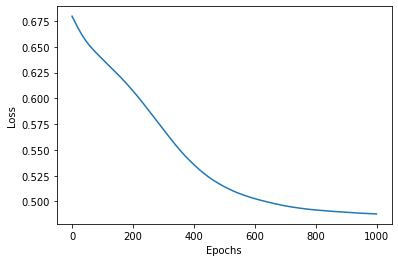

In [52]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [53]:
# Prediction in X_test data

predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        data=torch.FloatTensor(data)
        y_pred=model(data)
        #argmax - provides max index
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
1
1
1
0
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
1
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
1
1
0
0
0
1
0
0
1
1
1
1
0
1
0
1
1
1
0
1
0
0
1
1
1
0
0
0
0
1
1
1
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0


In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[73, 34],
       [ 7, 40]])

Text(69.0, 0.5, 'Predicted Values')

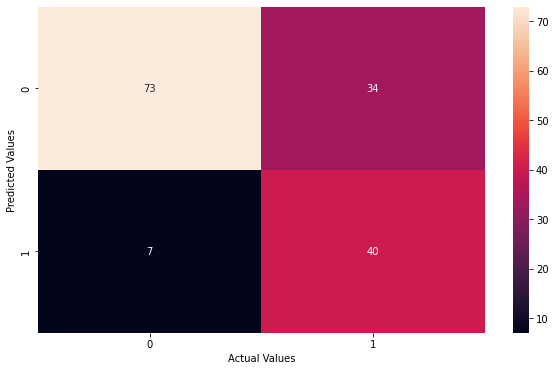

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [56]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7337662337662337

In [53]:
model.eval

<bound method Module.eval of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=5, bias=True)
  (f_connected2): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)>

In [56]:
#prediction on new data whether person has diabetes or not
#new data
lst1=[0.0, 176.0, 72.0, 45.0, 0.0, 33.6, 0.627, 80.0]

In [57]:
new_data=torch.tensor(lst1)

In [58]:
#predict new data
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([4.9782, 7.2261])
1
